In [1]:
#Graduate student:
# Write your own Runge-Kutta scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. 

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_aspect'

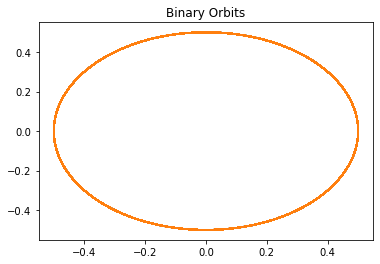

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(t, y): #equation function
    #FIXME: UPDATE FOR OUR PROBLEM
    f=np.zeros((2,4))
    r1=np.sqrt(y[0][0]**2+y[0][2]**2) #distance of star1 from center of mass
    r2=np.sqrt(y[1][0]**2+y[1][2]**2) #distance of star1 from center of mass
    f[0][0]=y[0][1]
    f[0][1]=-G*M/r1/r1/r1*y[0][0]
    f[0][2]=y[0][3]
    f[0][3]=-G*M/r1/r1/r1*y[0][2]
    f[1][0]=y[1][1]
    f[1][1]=-G*M/r2/r2/r2*y[1][0]
    f[1][2]=y[1][3]
    f[1][3]=-G*M/r2/r2/r2*y[1][2]
    return f
    
def rk4(t, h, y): #Runge-Kutta rule
    k1 = np.zeros((2,4))
    k2 = np.zeros((2,4))
    k3 = np.zeros((2,4))
    k4 = np.zeros((2,4))
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(1/6)*(k1+2*k2+2*k3+k4)
    return y

#Set up our system - equal mass binary stars
G=1.     #gravitational constant
M=1.     #mass of stars 
period=2*np.pi  #time of 1 orbit
tend=100*period #evolve system for 100 binary orbits
h=0.01   #dt for system
y=[[0.5,0.,0.,np.sqrt(2)],[-0.5,0.,0.,-np.sqrt(2)]] # [y[0]=x, y[1]=v_{x}, y[2]=y, y[3]=v_{y}]x2 for each star
t=0      #initial time

#Set up array to record (x,y) values for both stars
x1arr = []
y1arr = []
x2arr = []
y2arr = []

while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y)
    x1arr=np.append(x1arr,y[0][0])
    y1arr=np.append(y1arr,y[0][2])
    x2arr=np.append(x2arr,y[1][0])
    y2arr=np.append(y2arr,y[1][2])
    t = t+h

    
#Plot orbits
plt.plot(x1arr,y1arr)
plt.plot(x2arr, y2arr)
plt.title("Binary Orbits")
plt.set_aspect("equal")
plt.show()